In [66]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
#spark=SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()
sc = spark.sparkContext
import matplotlib.pyplot as plt
import pandas
from pyspark.sql.functions import *

In [67]:
spark

In [68]:
df= spark.read.format("csv").option("header", "true").load(r"D:\DBDA\FINAL_PROJECT\vehicles.csv")

In [69]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [70]:
df.count()

441802

In [71]:
# Count null values for each column
null_counts = df.select([sum(col(column).isNull().cast('int')).alias(column) for column in df.columns])

# Show the counts
print(null_counts.show())

+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
| id| url|region|region_url|price|year|manufacturer|model|condition|cylinders| fuel|odometer|title_status|transmission|   VIN| drive|  size|  type|paint_color|image_url|description|county|state|  lat| long|posting_date|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
|  0|9884|  6901|      6533| 6446|7890|       28937|17506|   187143|   190798|16344|   17801|       21618|       15932|174486|144178|319997|106892|     143839|    13732|      13733|382283|23077|25397|24715|       22477|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+-

In [72]:
columns_to_delete = ['id', 'url', 'region_url','VIN','image_url','description','county','lat','long','posting_date','size','region']

# Drop the columns
df1 = df.drop(*columns_to_delete)

# Show the DataFrame after dropping columns
#df1.show()

In [73]:
df1.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



# price

In [74]:
# deleting price records where price is equal to null:
df3 = df1.filter(df['price']!=0)

null_count = df2.filter(col("price").isNull()).count()
print("null records" ,null_count)

null_count = df2.filter(col("price").isNotNull()).count()
print("not null records" ,null_count)

total_count = df2.select('price').count()

print("total count ",total_count)


null records 0
not null records 399808
total count  399808


# odometer :

In [75]:
null_count = df3.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('odometer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('odometer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("odometer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 7883
not null records 391925
total count  399808
--------------------------------------
+--------+-----+
|odometer|count|
+--------+-----+
|   59072|  169|
|   88140|    1|
|  170273|    2|
|  131033|    5|
|  158371|    5|
|  124592|    1|
|   97935|    3|
|   12394|   17|
|   86180|    1|
|   39457|    3|
|   18992|    3|
|   35444|    7|
|    1159|    1|
|   81206|    3|
|   29912|    2|
|   89555|    7|
|  167438|    2|
|  138004|    1|
|   51550|    3|
|   80305|    5|
+--------+-----+
only showing top 20 rows

None
--------------------------------------
+--------+
|odometer|
+--------+
|   59072|
|   88140|
|  170273|
|  131033|
|  158371|
|  124592|
|   97935|
|   12394|
|   86180|
|   39457|
|   18992|
|   35444|
|    1159|
|   81206|
|   29912|
|   89555|
|  167438|
|  138004|
|   51550|
|   80305|
+--------+
only showing top 20 rows

98804


In [76]:
# converting odometer to integer type:

# Convert data type from string to integer
df4 = df3.withColumn("odometer", col('odometer').cast("int"))

# Show the DataFrame schema to verify the changes
df4.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



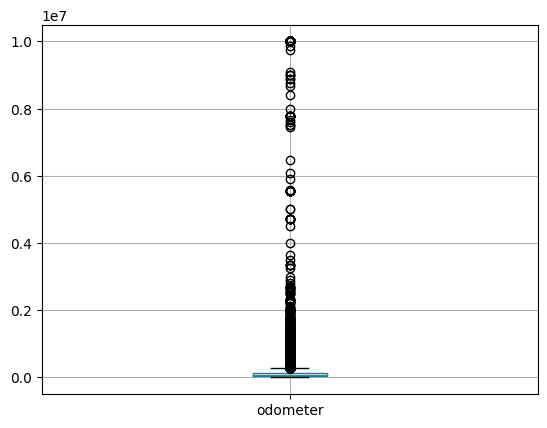

In [77]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df4.toPandas()

# Plot the boxplot using Pandas
pandas_df.boxplot(column='odometer')

# Show the plot
plt.show()


In [78]:
pandas_df.describe()

,odometer
count,3.916900e+05
mean,9.872930e+04
std,2.059169e+05
min,0.000000e+00
25%,3.800000e+04
50%,8.700000e+04
75%,1.353340e+05
max,1.000000e+07


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

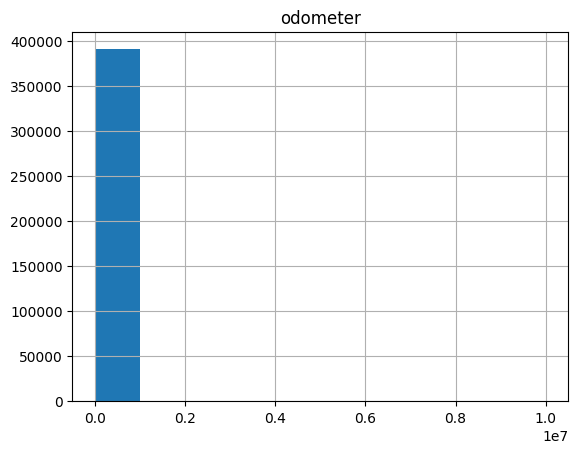

In [79]:
pandas_df.hist()

In [80]:
# Fill null values in specific columns with different values
df5 = df4.fillna({'odometer': 98729})

In [81]:
null_count = df5.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('odometer').count()

print("total count ",total_count)


null records 0
not null records 399808
total count  399808


# year :

In [82]:
from pyspark.sql.functions import to_timestamp, year

# Assuming df is your Spark DataFrame with a column named 'timestamp_str' of string type
# Convert the string column to a timestamp column
df6 = df5.withColumn('year', to_timestamp(df['year'], 'yyyy-MM-dd HH:mm:ss'))

# Extract the year from the timestamp column
df6 = df5.withColumn('year', year(df['year']))


In [83]:
df6.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = false)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



In [84]:
null_count = df6.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 2045
not null records 397763
total count  399808
--------------------------------------
+----+-----+
|year|count|
+----+-----+
|1959|   89|
|1990|  592|
|1975|  193|
|1977|  261|
|1924|    9|
|2003| 6910|
|2007|14180|
|2018|32644|
|1974|  274|
|2015|27983|
|1927|   36|
|1955|  223|
|2006|12087|
|1978|  343|
|2022|  106|
|1961|   82|
|2013|28198|
|1942|   14|
|1939|   47|
|null| 2045|
+----+-----+
only showing top 20 rows

None
--------------------------------------
+----+
|year|
+----+
|1959|
|1990|
|1975|
|1977|
|1924|
|2003|
|2007|
|2018|
|1974|
|2015|
|1927|
|1955|
|2006|
|1978|
|2022|
|1961|
|2013|
|1942|
|1939|
|null|
+----+
only showing top 20 rows

114


In [85]:
# Fill null values in specific columns with different values
df7 = df6.fillna({'year': 2011})

In [86]:
null_count = df7.filter(col("year").isNull()).count()
print("null records" ,null_count)

null records 0


# cylinders :

In [87]:
null_count = df7.filter(col("cylinders").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("cylinders").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('cylinders').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('cylinders').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("cylinders").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 166001
not null records 233807
total count  399808
--------------------------------------
+------------+------+
|   cylinders| count|
+------------+------+
|        null|166001|
| 3 cylinders|   613|
|       other|  1083|
|10 cylinders|  1389|
| 6 cylinders| 88846|
| 4 cylinders| 73005|
|12 cylinders|   204|
| 5 cylinders|  1670|
| 8 cylinders| 66762|
| f350 F-150 |    71|
|          LS|   164|
+------------+------+

None
--------------------------------------
+------------+
|   cylinders|
+------------+
|        null|
| 3 cylinders|
|       other|
|10 cylinders|
| 6 cylinders|
| 4 cylinders|
|12 cylinders|
| 5 cylinders|
| 8 cylinders|
| f350 F-150 |
|          LS|
+------------+

11


In [88]:
# Group by the categorical column and count occurrences
filtered_df = df7.filter(col("cylinders").isNotNull())

grouped_df = filtered_df.groupBy("cylinders").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("cylinders").first()
print("Mode Category:",mode_category)

Mode Category: Row(cylinders='6 cylinders')


In [89]:
# fill null values with 6 cylinders:
df8 = df7.fillna('6 cylindersw',subset=['cylinders'])

In [90]:
null_count = df8.filter(col("cylinders").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("cylinders").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('cylinders').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('cylinders').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("cylinders").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 399808
total count  399808
--------------------------------------
+------------+------+
|   cylinders| count|
+------------+------+
| 3 cylinders|   613|
|       other|  1083|
|10 cylinders|  1389|
| 6 cylinders| 88846|
| 4 cylinders| 73005|
|12 cylinders|   204|
| 5 cylinders|  1670|
| 8 cylinders| 66762|
|6 cylindersw|166001|
| f350 F-150 |    71|
|          LS|   164|
+------------+------+

None
--------------------------------------
+------------+
|   cylinders|
+------------+
| 3 cylinders|
|       other|
|10 cylinders|
| 6 cylinders|
| 4 cylinders|
|12 cylinders|
| 5 cylinders|
| 8 cylinders|
|6 cylindersw|
| f350 F-150 |
|          LS|
+------------+

11


# paint_color

In [91]:
null_count = df8.filter(col("paint_color").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("paint_color").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('paint_color').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('paint_color').count()
print(value_counts.show(15))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("paint_color").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 122739
not null records 277069
total count  399808
--------------------------------------
+-----------+------+
|paint_color| count|
+-----------+------+
|     orange|  1854|
|       grey| 22842|
|      green|  7079|
|     yellow|  2035|
|       null|122739|
|     silver| 40074|
|     purple|   677|
|      white| 72860|
|        red| 28842|
|     custom|  6412|
|      black| 58508|
|      brown|  6188|
|       blue| 29463|
|   long bed|    71|
|         RT|   164|
+-----------+------+

None
--------------------------------------
+-----------+
|paint_color|
+-----------+
|     orange|
|       grey|
|      green|
|     yellow|
|       null|
|     silver|
|     purple|
|      white|
|        red|
|     custom|
|      black|
|      brown|
|       blue|
|   long bed|
|         RT|
+-----------+

15


In [92]:
# Group by the categorical column and count occurrences
filtered_df = df8.filter(col("paint_color").isNotNull())

grouped_df = filtered_df.groupBy("paint_color").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("paint_color").first()
print("Mode Category:",mode_category)

Mode Category: Row(paint_color='white')


In [93]:
# fill null values with 6 cylinders:
df9 = df8.fillna('white',subset=['paint_color'])

In [94]:
null_count = df9.filter(col("paint_color").isNull()).count()
print("null records" ,null_count)

null_count = df9.filter(col("paint_color").isNotNull()).count()
print("not null records" ,null_count)

total_count = df9.select('paint_color').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df9.groupBy('paint_color').count()
print(value_counts.show(15))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df9.select("paint_color").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 399808
total count  399808
--------------------------------------
+-----------+------+
|paint_color| count|
+-----------+------+
|     orange|  1854|
|       grey| 22842|
|      green|  7079|
|     yellow|  2035|
|     silver| 40074|
|     purple|   677|
|      white|195599|
|        red| 28842|
|     custom|  6412|
|      black| 58508|
|      brown|  6188|
|       blue| 29463|
|   long bed|    71|
|         RT|   164|
+-----------+------+

None
--------------------------------------
+-----------+
|paint_color|
+-----------+
|     orange|
|       grey|
|      green|
|     yellow|
|     silver|
|     purple|
|      white|
|        red|
|     custom|
|      black|
|      brown|
|       blue|
|   long bed|
|         RT|
+-----------+

14


# drive

In [95]:
null_count = df9.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df9.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df9.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df9.groupBy('drive').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df9.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 125845
not null records 273963
total count  399808
--------------------------------------
+---------+------+
|    drive| count|
+---------+------+
|     null|125845|
|      fwd| 97680|
|      rwd| 55380|
|      4wd|120668|
| Flatbed |    71|
|       X3|   164|
+---------+------+

None
--------------------------------------
+---------+
|    drive|
+---------+
|     null|
|      fwd|
|      rwd|
|      4wd|
| Flatbed |
|       X3|
+---------+

6


In [96]:
# Group by the categorical column and count occurrences
filtered_df = df9.filter(col("drive").isNotNull())

grouped_df = filtered_df.groupBy("drive").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("drive").first()
print("Mode Category:",mode_category)

Mode Category: Row(drive='4wd')


In [97]:
# fill null values with "4wd":
df10 = df9.fillna('4wd',subset=['drive'])

In [98]:
#Define a list of values to match
names_to_match = ['fwd','rwd','4wd']

#Filter DataFrame to delete rows where name is in the list of values or is null
df11 = df10.filter((col("drive").isin(names_to_match)) )

In [99]:
null_count = df11.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df11.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df11.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df11.groupBy('drive').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df11.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 399573
total count  399573
--------------------------------------
+-----+------+
|drive| count|
+-----+------+
|  fwd| 97680|
|  rwd| 55380|
|  4wd|246513|
+-----+------+

None
--------------------------------------
+-----+
|drive|
+-----+
|  fwd|
|  rwd|
|  4wd|
+-----+

3


# manufacturer

In [100]:
null_count = df11.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df11.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df11.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df11.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df11.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 20977
not null records 378596
total count  399573
--------------------------------------
+--------------------+-----+
|        manufacturer|count|
+--------------------+-----+
|              jaguar| 1902|
|               buick| 5184|
|          mitsubishi| 3109|
|             pontiac| 2230|
|               lexus| 7741|
|                null|20977|
|              toyota|31598|
|            chrysler| 5656|
|               tesla|  847|
|             lincoln| 4035|
|                audi| 7180|
|              datsun|   63|
|                 bmw|13745|
|                jeep|17461|
|               dodge|12369|
|               rover| 1992|
|             hyundai| 9374|
|                ford|64855|
|          alfa-romeo|  870|
|            cadillac| 6591|
|                 ram|16464|
|               mazda| 5048|
|             ferrari|   81|
|                 kia| 7547|
|       mercedes-benz|10460|
|             porsche| 1304|
|              saturn| 1072|
|           chevrolet|50642|

+------------+
|manufacturer|
+------------+
|      jaguar|
|       buick|
|  mitsubishi|
|     pontiac|
|       lexus|
|        null|
|      toyota|
|    chrysler|
|       tesla|
|     lincoln|
|        audi|
|      datsun|
|         bmw|
|        jeep|
|       dodge|
|       rover|
|     hyundai|
|        ford|
|  alfa-romeo|
|    cadillac|
+------------+
only showing top 20 rows

844


In [101]:
# Group by the categorical column and count occurrences
filtered_df = df11.filter(col("manufacturer").isNotNull())

grouped_df = filtered_df.groupBy("manufacturer").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("manufacturer").first()
print("Mode Category:",mode_category)

Mode Category: Row(manufacturer='ford')


In [102]:
# fill null values with "4wd":
df12 = df11.fillna('ford',subset=['manufacturer'])

In [103]:
null_count = df12.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df12.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df12.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df12.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df12.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 399573
total count  399573
--------------------------------------
+--------------------+-----+
|        manufacturer|count|
+--------------------+-----+
|              jaguar| 1902|
|               buick| 5184|
|          mitsubishi| 3109|
|             pontiac| 2230|
|               lexus| 7741|
|              toyota|31598|
|            chrysler| 5656|
|               tesla|  847|
|             lincoln| 4035|
|                audi| 7180|
|              datsun|   63|
|                 bmw|13745|
|                jeep|17461|
|               dodge|12369|
|               rover| 1992|
|             hyundai| 9374|
|                ford|85832|
|          alfa-romeo|  870|
|            cadillac| 6591|
|                 ram|16464|
|               mazda| 5048|
|             ferrari|   81|
|                 kia| 7547|
|       mercedes-benz|10460|
|             porsche| 1304|
|              saturn| 1072|
|           chevrolet|50642|
|               honda|19867|
|  

+------------+
|manufacturer|
+------------+
|      jaguar|
|       buick|
|  mitsubishi|
|     pontiac|
|       lexus|
|      toyota|
|    chrysler|
|       tesla|
|     lincoln|
|        audi|
|      datsun|
|         bmw|
|        jeep|
|       dodge|
|       rover|
|     hyundai|
|        ford|
|  alfa-romeo|
|    cadillac|
|         ram|
+------------+
only showing top 20 rows

843


In [108]:
#Define a list of values to match
names_to_match = ['morgan','aston-martin','land rover','volvo','subaru','nissan','infiniti','gmc','acura','harley-davidson','mercury','volkswagen','fiat','mini','honda','chevrolet','saturn','porsche','mercedes-benz','kia','ferrari','mazda','ram','cadillac','alfa-romeo','ford','hyundai','rover','dodge','jeep','bmw','datsun','audi','lincoln','tesla','chrysler','toyota','lexus','pontiac','mitsubishi','buick','jaguar']
 
#Filter DataFrame to select rows where name is in the list of values or is null
df13 = df12.filter((col("manufacturer").isin(names_to_match)) )

In [109]:
null_count = df13.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df13.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df13.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df13.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df13.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+---------------+-----+
|   manufacturer|count|
+---------------+-----+
|         jaguar| 1902|
|          buick| 5184|
|     mitsubishi| 3109|
|        pontiac| 2230|
|          lexus| 7741|
|         toyota|31598|
|       chrysler| 5656|
|          tesla|  847|
|        lincoln| 4035|
|           audi| 7180|
|         datsun|   63|
|            bmw|13745|
|           jeep|17461|
|          dodge|12369|
|          rover| 1992|
|        hyundai| 9374|
|           ford|85832|
|     alfa-romeo|  870|
|       cadillac| 6591|
|            ram|16464|
|          mazda| 5048|
|        ferrari|   81|
|            kia| 7547|
|  mercedes-benz|10460|
|        porsche| 1304|
|         saturn| 1072|
|      chevrolet|50642|
|          honda|19867|
|           mini| 2260|
|           fiat|  772|
|     volkswagen| 8898|
|        mercury| 1137|
|harley-davidson|  138|
|          acura| 5707|
|            g

# model

In [110]:
null_count = df13.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df13.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df13.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df13.groupBy('model').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df13.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 9492
not null records 389280
total count  398772
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|            lacrosse|  396|
|             4runner|  986|
|                 dts|  243|
|           cts sedan|   46|
|           1969 nova|    1|
|                 hse|   66|
|super duty f-350 ...|    2|
|                 xk8|   28|
|                hr-v|  153|
|       sonata hybrid|   87|
|          charger se|   59|
|      avalon limited|   67|
|         2500 diesel|   33|
|               gem 2|    1|
|               azera|   39|
|transit connect c...|   29|
|  cherokee trailhawk|   24|
|   eclipse cross sel|   30|
|           sentra sv|  175|
|          crv lx awd|   24|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 

In [111]:
# Group by the categorical column and count occurrences
filtered_df = df13.filter(col("model").isNotNull())

grouped_df = filtered_df.groupBy("model").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("model").first()
print("Mode Category:",mode_category)

Mode Category: Row(model='f-150')


In [112]:
# fill null values with "f-150":
df14 = df13.fillna('f-150',subset=['model'])

In [113]:
null_count = df14.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df14.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df14.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df14.groupBy('model').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df14.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|            lacrosse|  396|
|             4runner|  986|
|                 dts|  243|
|           cts sedan|   46|
|           1969 nova|    1|
|                 hse|   66|
|super duty f-350 ...|    2|
|                 xk8|   28|
|                hr-v|  153|
|       sonata hybrid|   87|
|          charger se|   59|
|      avalon limited|   67|
|         2500 diesel|   33|
|               gem 2|    1|
|               azera|   39|
|transit connect c...|   29|
|  cherokee trailhawk|   24|
|   eclipse cross sel|   30|
|           sentra sv|  175|
|          crv lx awd|   24|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 dts

# fuel

In [114]:
null_count = df14.filter(col("fuel").isNull()).count()
print("null records" ,null_count)

null_count = df14.filter(col("fuel").isNotNull()).count()
print("not null records" ,null_count)

total_count = df14.select('fuel').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df14.groupBy('fuel').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df14.select("fuel").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 7386
not null records 391386
total count  398772
--------------------------------------
+--------+------+
|    fuel| count|
+--------+------+
|     gas|330426|
|    null|  7386|
|   other| 28125|
|  diesel| 26323|
|  hybrid|  4886|
|electric|  1626|
+--------+------+

None
--------------------------------------
+--------+
|    fuel|
+--------+
|     gas|
|    null|
|   other|
|  diesel|
|  hybrid|
|electric|
+--------+

6


In [115]:
# Group by the categorical column and count occurrences
filtered_df = df14.filter(col("fuel").isNotNull())

grouped_df = filtered_df.groupBy("fuel").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("fuel").first()
print("Mode Category:",mode_category)

Mode Category: Row(fuel='gas')


In [116]:
# fill null values with "f-150":
df15 = df14.fillna('gas',subset=['fuel'])

In [117]:
null_count = df15.filter(col("fuel").isNull()).count()
print("null records" ,null_count)

null_count = df15.filter(col("fuel").isNotNull()).count()
print("not null records" ,null_count)

total_count = df15.select('fuel').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df15.groupBy('fuel').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df15.select("fuel").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+--------+------+
|    fuel| count|
+--------+------+
|     gas|337812|
|   other| 28125|
|  diesel| 26323|
|  hybrid|  4886|
|electric|  1626|
+--------+------+

None
--------------------------------------
+--------+
|    fuel|
+--------+
|     gas|
|   other|
|  diesel|
|  hybrid|
|electric|
+--------+

5


# transmission :

In [118]:
null_count = df15.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df15.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df15.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df15.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df15.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 6615
not null records 392157
total count  398772
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|        null|  6615|
|   automatic|306806|
|       other| 61492|
|      manual| 23859|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|        null|
|   automatic|
|       other|
|      manual|
+------------+

4


In [119]:
# Group by the categorical column and count occurrences
filtered_df = df15.filter(col("transmission").isNotNull())

grouped_df = filtered_df.groupBy("transmission").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("transmission").first()
print("Mode Category:",mode_category)

Mode Category: Row(transmission='automatic')


In [120]:
# fill null values with automatic:
df16 = df15.fillna('automatic',subset=['transmission'])

In [121]:
null_count = df16.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df16.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df16.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df16.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df16.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|   automatic|313421|
|       other| 61492|
|      manual| 23859|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|   automatic|
|       other|
|      manual|
+------------+

3


# title_status:

In [122]:
null_count = df16.filter(col("title_status").isNull()).count()
print("null records" ,null_count)

null_count = df16.filter(col("title_status").isNotNull()).count()
print("not null records" ,null_count)

total_count = df16.select('title_status').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df16.groupBy('title_status').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df16.select("title_status").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 12526
not null records 386246
total count  398772
--------------------------------------
+------------+------+
|title_status| count|
+------------+------+
|        null| 12526|
|        lien|  1421|
|     missing|   797|
|       clean|372862|
|     salvage|  3837|
|     rebuilt|  7140|
|  parts only|   189|
+------------+------+

None
--------------------------------------
+------------+
|title_status|
+------------+
|        null|
|        lien|
|     missing|
|       clean|
|     salvage|
|     rebuilt|
|  parts only|
+------------+

7


In [123]:
# Group by the categorical column and count occurrences
filtered_df = df16.filter(col("title_status").isNotNull())

grouped_df = filtered_df.groupBy("title_status").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("title_status").first()
print("Mode Category:",mode_category)

Mode Category: Row(title_status='clean')


In [124]:
# fill null values with clean:
df17 = df16.fillna('clean',subset=['title_status'])

In [125]:
null_count = df17.filter(col("title_status").isNull()).count()
print("null records" ,null_count)

null_count = df17.filter(col("title_status").isNotNull()).count()
print("not null records" ,null_count)

total_count = df17.select('title_status').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df17.groupBy('title_status').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df17.select("title_status").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+------------+------+
|title_status| count|
+------------+------+
|        lien|  1421|
|     missing|   797|
|       clean|385388|
|     salvage|  3837|
|     rebuilt|  7140|
|  parts only|   189|
+------------+------+

None
--------------------------------------
+------------+
|title_status|
+------------+
|        lien|
|     missing|
|       clean|
|     salvage|
|     rebuilt|
|  parts only|
+------------+

6


# type :

In [127]:
null_count = df17.filter(col("type").isNull()).count()
print("null records" ,null_count)

null_count = df17.filter(col("type").isNotNull()).count()
print("not null records" ,null_count)

total_count = df17.select('type').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df17.groupBy('type').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df17.select("type").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 90720
not null records 308052
total count  398772
--------------------------------------
+-----------+-----+
|       type|count|
+-----------+-----+
|        van| 7974|
|   mini-van| 4552|
|    offroad|  593|
|      wagon|10064|
|       null|90720|
|      coupe|18214|
|        bus|  499|
|        SUV|70599|
|      other|19873|
|convertible| 7439|
|      sedan|80322|
|  hatchback|15917|
|      truck|30634|
|     pickup|41372|
+-----------+-----+

None
--------------------------------------
+-----------+
|       type|
+-----------+
|        van|
|   mini-van|
|    offroad|
|      wagon|
|       null|
|      coupe|
|        bus|
|        SUV|
|      other|
|convertible|
|      sedan|
|  hatchback|
|      truck|
|     pickup|
+-----------+

14


In [128]:
# Group by the categorical column and count occurrences
filtered_df = df17.filter(col("type").isNotNull())

grouped_df = filtered_df.groupBy("type").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("type").first()
print("Mode Category:",mode_category)

Mode Category: Row(type='sedan')


In [129]:
# fill null values with clean:
df18 = df17.fillna('sedan',subset=['type'])

In [130]:
null_count = df18.filter(col("type").isNull()).count()
print("null records" ,null_count)

null_count = df18.filter(col("type").isNotNull()).count()
print("not null records" ,null_count)

total_count = df18.select('type').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df18.groupBy('type').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df18.select("type").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 398772
total count  398772
--------------------------------------
+-----------+------+
|       type| count|
+-----------+------+
|        van|  7974|
|   mini-van|  4552|
|    offroad|   593|
|      wagon| 10064|
|      coupe| 18214|
|        bus|   499|
|        SUV| 70599|
|      other| 19873|
|convertible|  7439|
|      sedan|171042|
|  hatchback| 15917|
|      truck| 30634|
|     pickup| 41372|
+-----------+------+

None
--------------------------------------
+-----------+
|       type|
+-----------+
|        van|
|   mini-van|
|    offroad|
|      wagon|
|      coupe|
|        bus|
|        SUV|
|      other|
|convertible|
|      sedan|
|  hatchback|
|      truck|
|     pickup|
+-----------+

13


# state :

In [131]:
null_count = df18.filter(col("state").isNull()).count()
print("null records" ,null_count)

null_count = df18.filter(col("state").isNotNull()).count()
print("not null records" ,null_count)

total_count = df18.select('state').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df18.groupBy('state').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df18.select("state").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 12068
not null records 386704
total count  398772
--------------------------------------
+--------------------+-----+
|               state|count|
+--------------------+-----+
| TIMING BELT AND ...|   31|
| FRESHLY SERVICED...|   17|
| do not contact m...|    1|
|          bad credit|   31|
|     finance charges|  137|
|           Ford Axle|    1|
| Absolutely Stunn...|    3|
| finished in MAGN...|    2|
| Full dash instru...|    1|
| tailgate step w/...|    2|
|                 LR4|    2|
| Active Parking A...|    2|
| the 2007 models ...|    1|
| 4-Way Manual Fro...|    2|
| Leather Trimmed ...|    1|
|                 A/C|    2|
| Mopar Trailer To...|    1|
|1Sd Preferred Equ...|    1|
| low-pressure gas...|    1|
| HondaLink Next G...|    1|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               state|
+--------------------+
| TIMING BELT AND ...|
| FRESHLY SERVICED...|
| do not contact 

In [134]:
#Define a list of values to match
names_to_match = ['az','ar','fl','ma','nc','ny','or','pa','tx','wa','wi','al','ak','ca','co','ct','dc','de','ga','hi','id','il','in','ia','ks','ky','la','me','md','mi','mn','ms','mo','mt','ne','nv','nj','nm','nh','nd','oh','ok','ri','sc','sd','tn','ut','vt','va','wv','wy']
#Filter DataFrame to select rows where name is in the list of values or is null
df19 = df18.filter((col("state").isin(names_to_match)) )

In [135]:
null_count = df19.filter(col("state").isNull()).count()
print("null records" ,null_count)

null_count = df19.filter(col("state").isNotNull()).count()
print("not null records" ,null_count)

total_count = df19.select('state').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df19.groupBy('state').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df19.select("state").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 339050
total count  339050
--------------------------------------
+-----+-----+
|state|count|
+-----+-----+
|   wi|10091|
|   ar| 3045|
|   fl|23492|
|   al| 4206|
|   ca|39853|
|   ma| 7179|
|   nc|10457|
|   pa|11827|
|   wa| 7102|
|   ak| 3025|
|   az| 7204|
|   or|10610|
|   ny|16189|
|   ct| 4410|
|   co| 8458|
|   de|  825|
|   dc| 2360|
|   il| 9206|
|   in| 5262|
|   ga| 5488|
+-----+-----+
only showing top 20 rows

None
--------------------------------------
+-----+
|state|
+-----+
|   wi|
|   ar|
|   fl|
|   al|
|   ca|
|   ma|
|   nc|
|   pa|
|   wa|
|   ak|
|   az|
|   or|
|   ny|
|   ct|
|   co|
|   de|
|   dc|
|   il|
|   in|
|   ga|
+-----+
only showing top 20 rows

51


# condition :

In [136]:
null_count = df19.filter(col("condition").isNull()).count()
print("null records" ,null_count)

null_count = df19.filter(col("condition").isNotNull()).count()
print("not null records" ,null_count)

total_count = df19.select('condition').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df19.groupBy('condition').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df19.select("condition").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 112193
not null records 226857
total count  339050
--------------------------------------
+---------+------+
|condition| count|
+---------+------+
|      new|  1005|
|     null|112193|
|excellent| 85699|
|  salvage|   580|
| like new| 18129|
|     good|114963|
|     fair|  6481|
+---------+------+

None
--------------------------------------
+---------+
|condition|
+---------+
|      new|
|     null|
|excellent|
|  salvage|
| like new|
|     good|
|     fair|
+---------+

7


In [137]:
# Group by the categorical column and count occurrences
filtered_df = df19.filter(col("condition").isNotNull())

grouped_df = filtered_df.groupBy("condition").count()

# Find the mode (category with the highest count)
mode_category = grouped_df.orderBy(col("count").desc()).select("condition").first()
print("Mode Category:",mode_category)

Mode Category: Row(condition='good')


In [138]:
# fill null values with clean:
df20 = df19.fillna('good',subset=['condition'])

In [140]:
null_count = df20.filter(col("condition").isNull()).count()
print("null records" ,null_count)

null_count = df20.filter(col("condition").isNotNull()).count()
print("not null records" ,null_count)

total_count = df20.select('condition').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df20.groupBy('condition').count()
print(value_counts.show(20))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df20.select("condition").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 339050
total count  339050
--------------------------------------
+---------+------+
|condition| count|
+---------+------+
|      new|  1005|
|excellent| 85699|
|  salvage|   580|
| like new| 18129|
|     good|227156|
|     fair|  6481|
+---------+------+

None
--------------------------------------
+---------+
|condition|
+---------+
|      new|
|excellent|
|  salvage|
| like new|
|     good|
|     fair|
+---------+

6


In [139]:
# Save DataFrame to a single CSV file
df20.coalesce(1).write.csv("file:///D:/DBDA/vehicle_EDA.csv", header=True)